In [1]:
import pandas as pd
import numpy as np
import glob as gb
import shutil as sh
import sklearn
import os
pd.options.display.float_format = '{:.1f}'.format

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import norm
from scipy.stats import boxcox
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import numpy as np
from numpy import exp
from numpy import inf
import seaborn as sns
import matplotlib.pyplot as plt



# pd.set_option('display.max_rows',None, 'display.max_columns',None)

%matplotlib inline

In [2]:
FinalIndex = "C:\\Users\padu\\Desktop\\IndexResearch\\FinalIndexData"
os.chdir(FinalIndex)

In [3]:
gb.glob(FinalIndex + "/*.csv")

['C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\FinalGeorgia.csv',
 'C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\FinalNorthCarolina.csv',
 'C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\GAPCAdata.csv',
 'C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\NCPCAdata.csv',
 'C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\NCPCAdataSensitivity.csv',
 'C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\NCPCAdataSensitivityNoHousing.csv',
 'C:\\Users\\padu\\Desktop\\IndexResearch\\FinalIndexData\\NCPCAdataSensitivityNoIncomeHousing.csv']

In [4]:
NC =  pd.read_csv("FinalNorthCarolina.csv")

In [5]:
NC.shape

(200, 16)

In [6]:
NC =  NC.fillna(0)



In [7]:
NC = NC.replace(inf, 0)


In [8]:
NC

,GEOID,ContractRentE,PerCapitaIncomePast12MonthsE,MedianHouseholdIncomeE,PovertyRate,UnemploymentRate,PercentReceivingSocialSecurity,PercentWithoutHealthInsurance,PercentSingleParent,PercentFemaleHeaded,PercentMinority,PercentMobileHomes,PercentRenters,PercentRentBurden,PercentBachelors,PercentNoSchooling
0,37119000100,1659.0,107357.0,113357.0,7.9,1.5,6.2,4.4,0.0,0.0,29.5,0.0,70.6,20.1,51.1,0.0
1,37119000300,1331.0,77023.0,63795.0,26.5,6.2,20.5,3.4,5.0,0.0,30.9,0.0,69.2,25.9,50.7,0.6
2,37119000400,1366.0,61359.0,79412.0,12.5,2.5,7.8,4.5,0.0,0.0,22.1,0.0,89.1,30.9,47.8,0.4
3,37119000500,1249.0,51922.0,76344.0,12.5,2.6,13.1,4.4,6.6,6.6,43.6,0.8,68.9,22.2,39.5,0.6
4,37119000600,1197.0,43210.0,51667.0,19.8,2.8,9.9,3.0,42.3,24.8,54.7,0.7,84.2,38.4,39.7,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,37119006107,1134.0,36510.0,62466.0,7.4,3.6,7.6,12.8,24.9,24.9,77.6,0.7,67.3,26.9,34.7,0.4
196,37119006108,1271.0,25079.0,62894.0,10.9,5.4,16.9,14.2,26.6,15.6,80.5,3.4,28.8,13.8,23.3,1.5
197,37119006109,772.0,24686.0,38092.0,17.5,14.6,29.3,13.1,29.1,22.2,84.8,0.0,43.1,26.0,15.0,1.0
198,37119005906,630.0,31191.0,54928.0,21.0,5.9,22.7,19.5,9.0,9.0,53.9,31.8,32.1,13.9,15.9,3.3


### North Carolina


In [9]:
NC.describe()

,GEOID,ContractRentE,PerCapitaIncomePast12MonthsE,MedianHouseholdIncomeE,PovertyRate,UnemploymentRate,PercentReceivingSocialSecurity,PercentWithoutHealthInsurance,PercentSingleParent,PercentFemaleHeaded,PercentMinority,PercentMobileHomes,PercentRenters,PercentRentBurden,PercentBachelors,PercentNoSchooling
count,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
mean,37119008979.4,1021.7,37613.1,69135.1,14.0,5.3,20.4,12.7,18.5,14.4,57.6,1.5,47.0,22.9,28.1,1.7
std,69043.8,300.9,21930.6,36230.1,11.6,3.6,8.5,8.6,12.5,11.0,27.2,3.9,22.5,14.2,13.1,1.9
min,37119000100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,37119002575.0,805.2,21985.0,42752.8,4.9,2.8,14.7,5.9,9.2,7.1,35.5,0.0,29.5,11.2,16.7,0.3
50%,37119004750.0,995.0,32322.5,62834.5,11.1,4.5,19.7,11.5,15.6,11.9,63.9,0.3,45.7,20.2,28.7,1.0
75%,37119005815.2,1212.0,48554.8,85522.2,19.6,6.6,26.6,17.5,26.3,20.4,79.8,1.3,64.3,32.4,38.6,2.5
max,37119980200.0,2363.0,126736.0,244539.0,59.5,17.8,49.8,42.5,70.4,68.5,99.0,31.8,96.4,64.6,51.9,11.1


In [10]:
NC.dtypes

GEOID                               int64
ContractRentE                     float64
PerCapitaIncomePast12MonthsE      float64
MedianHouseholdIncomeE            float64
PovertyRate                       float64
UnemploymentRate                  float64
PercentReceivingSocialSecurity    float64
PercentWithoutHealthInsurance     float64
PercentSingleParent               float64
PercentFemaleHeaded               float64
PercentMinority                   float64
PercentMobileHomes                float64
PercentRenters                    float64
PercentRentBurden                 float64
PercentBachelors                  float64
PercentNoSchooling                float64
dtype: object

## Visualization of Data

### All Variables 

### North Carolina

In [11]:
# sns.pairplot(NC,diag_kind='kde', plot_kws={'alpha': 0.2})

### North Carolina

### Create Variance Inflation Factor Function

In [12]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

### North Carolina

In [13]:
NC_vif = NC.drop('GEOID',1)  ## Drop the GEOID column since it's an ID field not a variable


In [14]:
calc_vif(NC_vif).sort_values(by=['VIF'],ascending=False)

,variables,VIF
7,PercentSingleParent,49.8
11,PercentRenters,49.6
8,PercentFemaleHeaded,40.6
12,PercentRentBurden,38.9
2,MedianHouseholdIncomeE,37.0
1,PerCapitaIncomePast12MonthsE,33.6
13,PercentBachelors,27.8
0,ContractRentE,24.9
9,PercentMinority,22.1
3,PovertyRate,11.1


### Check correlation between variables 

### North Carolina

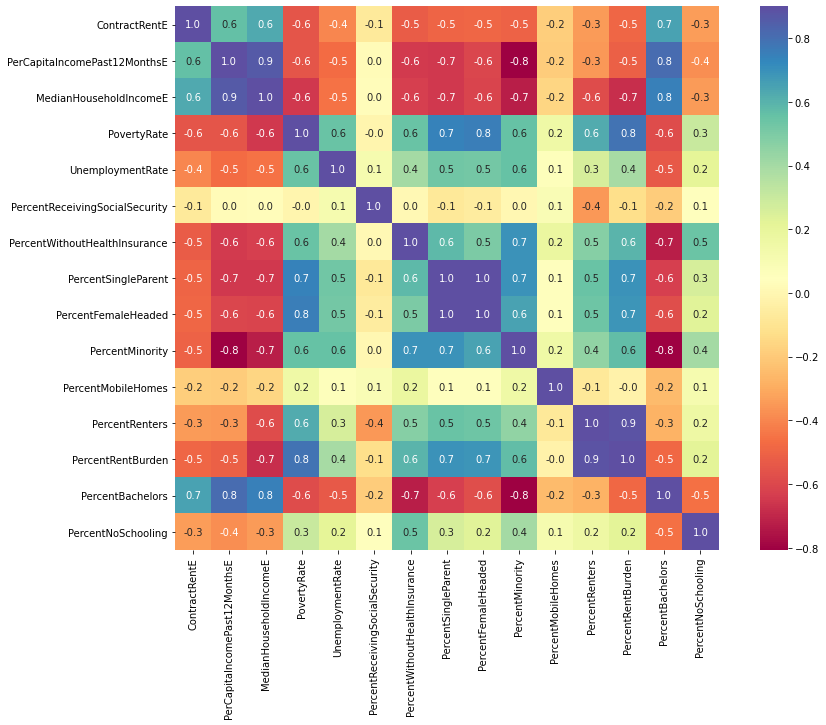

In [15]:
corrmat = NC_vif.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat,xticklabels= NC_vif.columns, vmax=0.9, square=True,fmt= '.1f',annot_kws={'size': 10}, 
            annot= True, cmap="Spectral")
plt.savefig('correlation.png',dpi = 60)
plt.show();

In [16]:
NC.columns

Index(['GEOID', 'ContractRentE', 'PerCapitaIncomePast12MonthsE',
       'MedianHouseholdIncomeE', 'PovertyRate', 'UnemploymentRate',
       'PercentReceivingSocialSecurity', 'PercentWithoutHealthInsurance',
       'PercentSingleParent', 'PercentFemaleHeaded', 'PercentMinority',
       'PercentMobileHomes', 'PercentRenters', 'PercentRentBurden',
       'PercentBachelors', 'PercentNoSchooling'],
      dtype='object')

### Check the histogram and normal distribution of all variables

### North Carolina

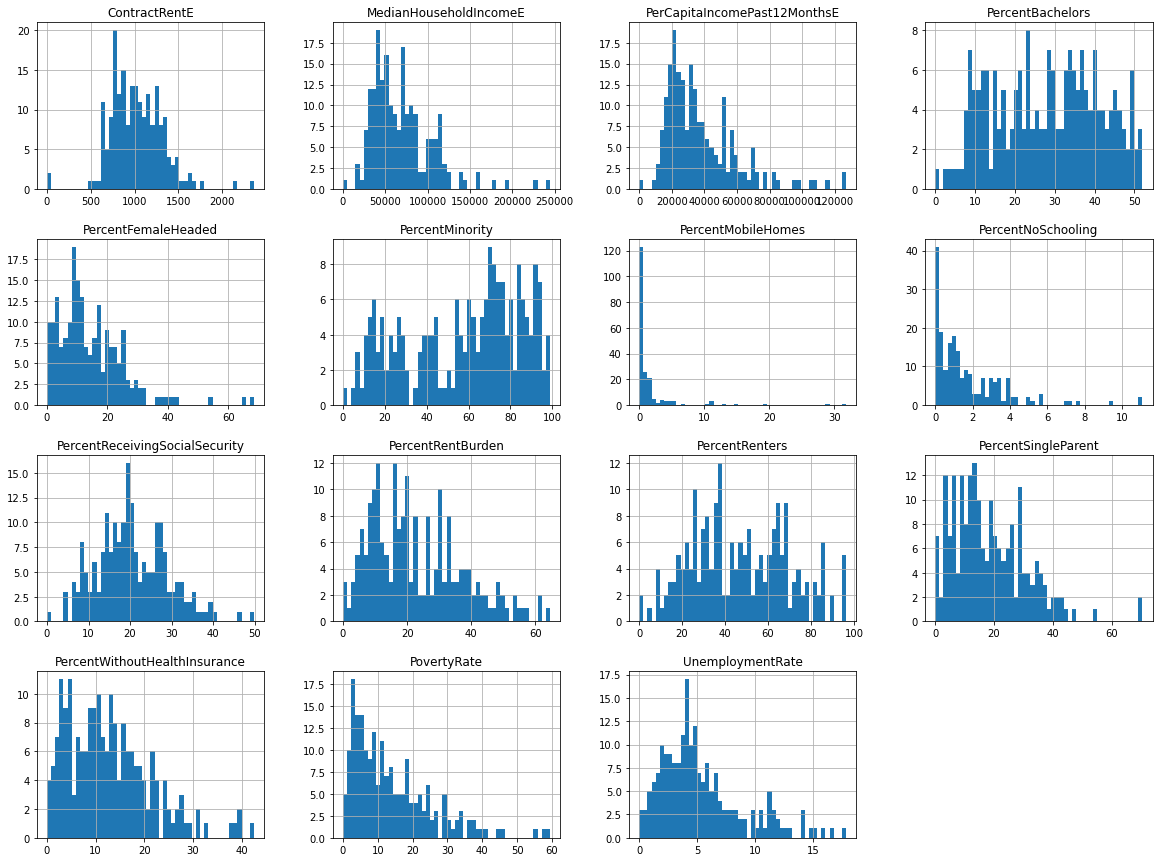

In [17]:
NC_vif.hist(bins = 50, figsize = (20,15))
plt.savefig('histogram.png',dpi=100)
plt.show()

### Contract Rent

#### North Carolina

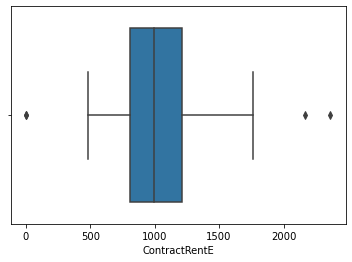

In [18]:
sns.boxplot(NC.ContractRentE)
plt.show()

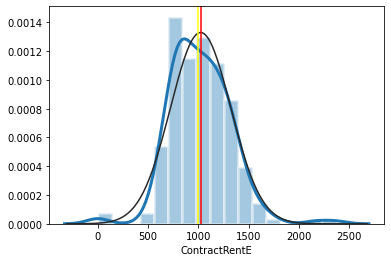

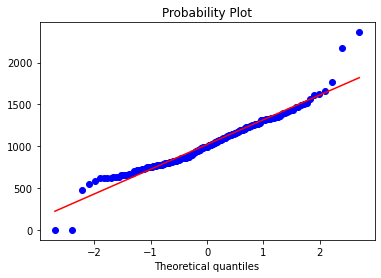

skewness: 0.531385
kurtosis: 2.776756


In [19]:
# kernel density plot
sns.distplot(NC.ContractRentE,fit=norm, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3});
plt.ylabel =('Frequency')
plt.axvline(NC['ContractRentE'].mean(),0,1, color = "red")
plt.axvline(NC['ContractRentE'].median(),0,1, color = "yellow")
plt.savefig('Contractrent2',dpi = 60)

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['ContractRentE']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['ContractRentE'], plot=plt)
plt.savefig('Contractrent',dpi = 60)
plt.show()
print("skewness: %f" % NC['ContractRentE'].skew())
print("kurtosis: %f" % NC['ContractRentE'].kurt())

### PerCapitaIncomePast12MonthsE

### North Carolina

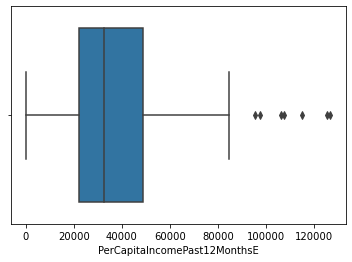

In [20]:
sns.boxplot(NC.PerCapitaIncomePast12MonthsE)
plt.show()

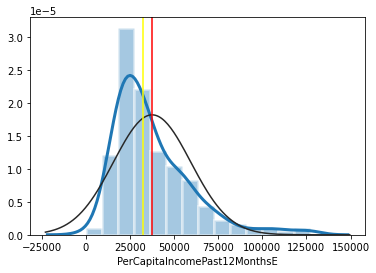

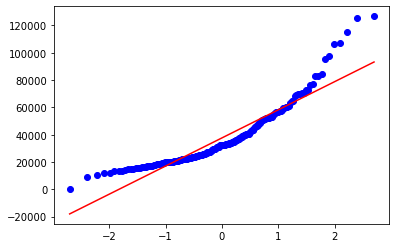

skewness: 1.574605
kurtosis: 3.045386


In [21]:
# kernel density plot
sns.distplot(NC.PerCapitaIncomePast12MonthsE, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PerCapitaIncomePast12MonthsE'].mean(),0,1, color = "red")
plt.axvline(NC['PerCapitaIncomePast12MonthsE'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
plt.savefig('PerCapitaIncomePast12MonthsE2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PerCapitaIncomePast12MonthsE']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PerCapitaIncomePast12MonthsE'], plot=plt)
plt.savefig('PerCapitaIncomePast12MonthsE',dpi = 60)
plt.show()
print("skewness: %f" % NC['PerCapitaIncomePast12MonthsE'].skew())
print("kurtosis: %f" % NC['PerCapitaIncomePast12MonthsE'].kurt())

### North Carolina

### PovertyRate

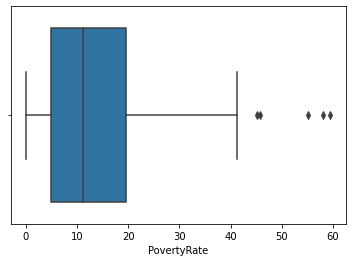

In [22]:
sns.boxplot(NC.PovertyRate)
plt.show()

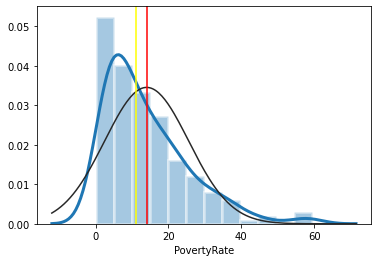

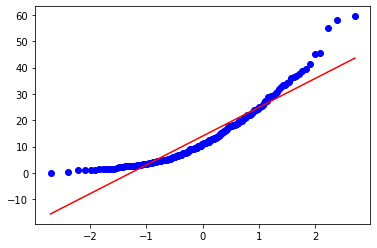

skewness: 1.366960
kurtosis: 2.057617


In [23]:
# kernel density plot
sns.distplot(NC.PovertyRate,fit=norm, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3});
plt.axvline(NC['PovertyRate'].mean(),0,1, color = "red")
plt.axvline(NC['PovertyRate'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.savefig('PovertyRate2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PovertyRate']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PovertyRate'], plot=plt)
plt.savefig('PovertyRate',dpi = 60)
plt.show()
print("skewness: %f" % NC['PovertyRate'].skew())
print("kurtosis: %f" % NC['PovertyRate'].kurt())

In [24]:
W,p = stats.shapiro(NC['PovertyRate'])
print(W,p)

0.8792469501495361 1.443853283461527e-11


### North Carolina

### UnemploymentRate

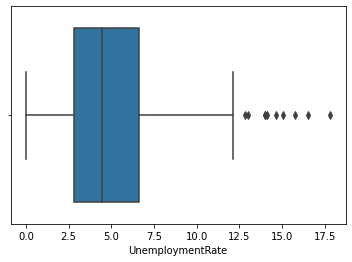

In [25]:
sns.boxplot(NC.UnemploymentRate)
plt.show()

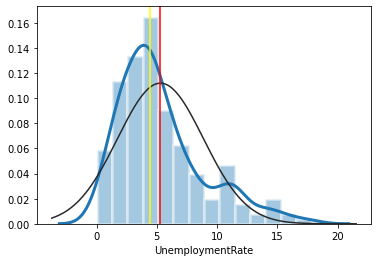

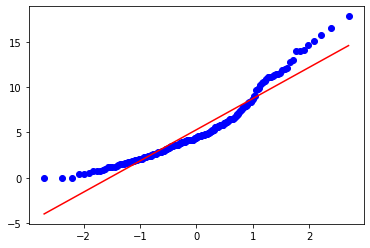

skewness: 1.144928
kurtosis: 1.039902


In [26]:
# kernel density plot
sns.distplot(NC.UnemploymentRate,fit=norm, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3});
plt.axvline(NC['UnemploymentRate'].mean(),0,1, color = "red")
plt.axvline(NC['UnemploymentRate'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.savefig('UnemploymentRate2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['UnemploymentRate']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['UnemploymentRate'], plot=plt)
plt.savefig('UnemploymentRate',dpi = 60)
plt.show()
print("skewness: %f" % NC['UnemploymentRate'].skew())
print("kurtosis: %f" % NC['UnemploymentRate'].kurt())

### North Carolina 

### PercentReceivingSocialSecurity

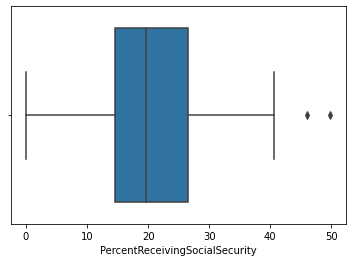

In [27]:
sns.boxplot(NC.PercentReceivingSocialSecurity)
plt.show()

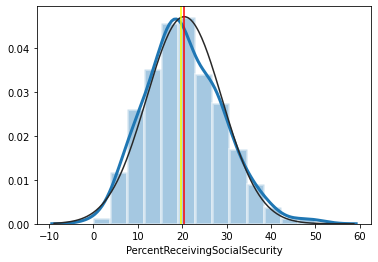

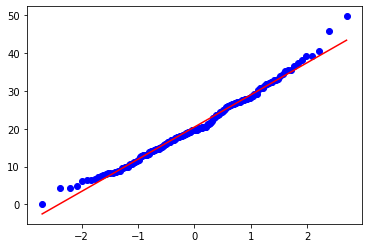

skewness: 0.423260
kurtosis: 0.247878


In [28]:
# kernel density plot
sns.distplot(NC.PercentReceivingSocialSecurity, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentReceivingSocialSecurity'].mean(),0,1, color = "red")
plt.axvline(NC['PercentReceivingSocialSecurity'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
plt.savefig('PercentReceivingSocialSecurity2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentReceivingSocialSecurity']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentReceivingSocialSecurity'], plot=plt)
plt.savefig('PercentReceivingSocialSecurity',dpi = 60)
plt.show()
print("skewness: %f" % NC['PercentReceivingSocialSecurity'].skew())
print("kurtosis: %f" % NC['PercentReceivingSocialSecurity'].kurt())


### PercentWithoutHealthInsurance

### North Carolina

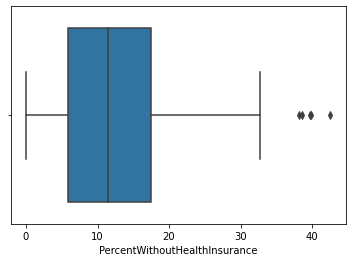

In [29]:
sns.boxplot(NC.PercentWithoutHealthInsurance)
plt.show()

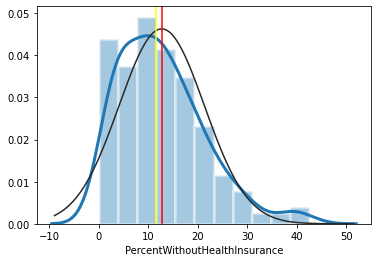

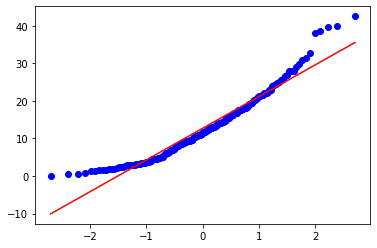

skewness: 0.952720
kurtosis: 0.913441


In [30]:
# kernel density plot
sns.distplot(NC.PercentWithoutHealthInsurance, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentWithoutHealthInsurance'].mean(),0,1, color = "red")
plt.axvline(NC['PercentWithoutHealthInsurance'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
plt.savefig('PercentWithoutHealthInsurance2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentWithoutHealthInsurance']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentWithoutHealthInsurance'], plot=plt)
plt.savefig('PercentWithoutHealthInsurance',dpi = 60)
plt.show()
print("skewness: %f" % NC['PercentWithoutHealthInsurance'].skew())
print("kurtosis: %f" % NC['PercentWithoutHealthInsurance'].kurt())


### PercentSingleParent

### North Carolina

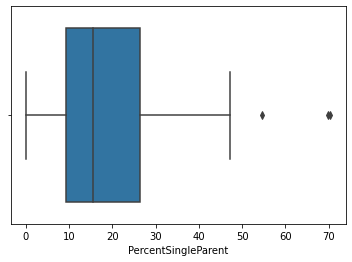

In [31]:
sns.boxplot(NC.PercentSingleParent)
plt.show()

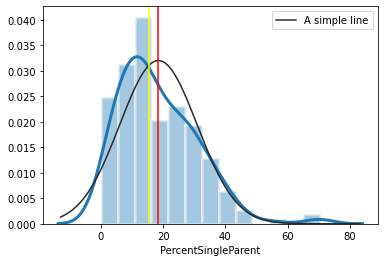

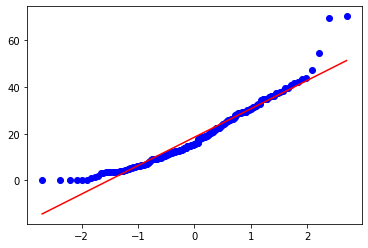

skewness: 1.034124
kurtosis: 1.789837


In [32]:
# kernel density plot
sns.distplot(NC.PercentSingleParent, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentSingleParent'].mean(),0,1, color = "red")
plt.axvline(NC['PercentSingleParent'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
plt.savefig('PercentSingleParent2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentSingleParent']);
plt.legend(['A simple line'])
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentSingleParent'], plot=plt)
plt.savefig('PercentSingleParent',dpi = 60)
plt.show()
print("skewness: %f" % NC['PercentSingleParent'].skew())
print("kurtosis: %f" % NC['PercentSingleParent'].kurt())


### North Carolina

### PercentFemaleHeaded

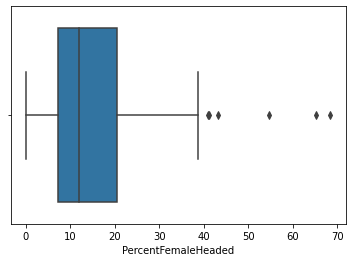

In [33]:
sns.boxplot(NC.PercentFemaleHeaded)
plt.show()

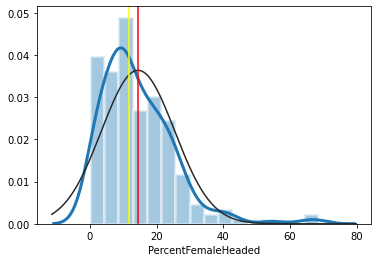

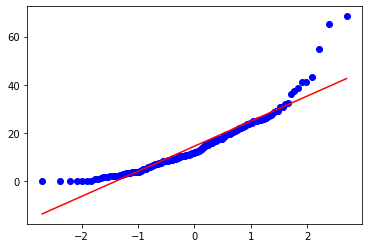

skewness: 1.647564
kurtosis: 4.812203


In [34]:
# kernel density plot
sns.distplot(NC.PercentFemaleHeaded, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentFemaleHeaded'].mean(),0,1, color = "red")
plt.axvline(NC['PercentFemaleHeaded'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
plt.savefig('PercentFemaleHeaded2',dpi = 60)
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentFemaleHeaded']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentFemaleHeaded'], plot=plt)
plt.savefig('PercentFemaleHeaded',dpi = 60)
plt.show()
print("skewness: %f" % NC['PercentFemaleHeaded'].skew())
print("kurtosis: %f" % NC['PercentFemaleHeaded'].kurt())


In [35]:
## Positive skew : Pile of data to the left  ## Mode <Median < Mean
## Negative skew : Pile of data to the right ## Mean <Median < Mode
## Normal distribution should have 0 skew
### Kurtosis measures the shape of the curve, it measures if the bell of the curve is normal, flat or peaked
### Mesokurtic = normal distribution = 0
### Leptokurtic > 0 
### Platykurtic < 0

### PercentMinority

### North Carolina

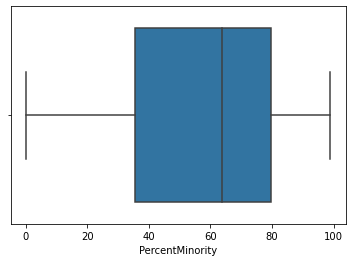

In [36]:
sns.boxplot(NC.PercentMinority)
plt.show()

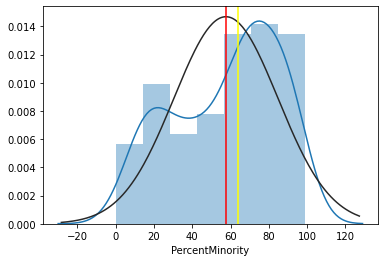

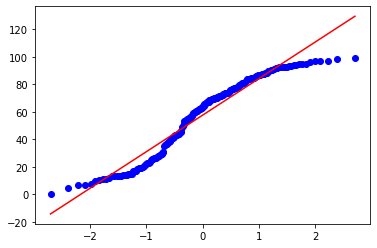

skewness: -0.389302
kurtosis: -1.101592


In [37]:
# kernel density plot
sns.distplot(NC.PercentMinority,fit=norm);
plt.ylabel =('Frequency')
plt.axvline(NC['PercentMinority'].mean(),0,1, color = "red")
plt.axvline(NC['PercentMinority'].median(),0,1, color = "yellow")

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentMinority']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentMinority'], plot=plt)
plt.show()
print("skewness: %f" % NC['PercentMinority'].skew())
print("kurtosis: %f" % NC['PercentMinority'].kurt())

In [38]:
## Two peaks bimodal

### PercentMobileHomes

### North Carolina

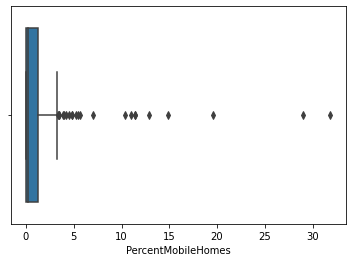

In [39]:
sns.boxplot(NC.PercentMobileHomes)
plt.show()

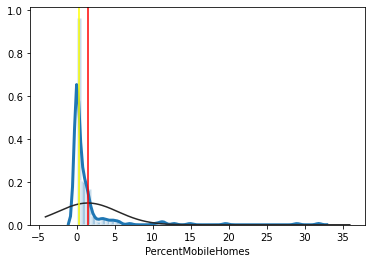

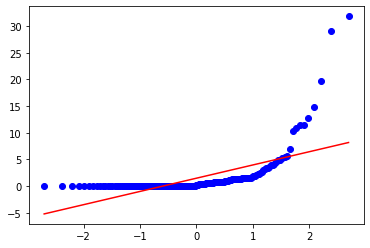

skewness: 5.178272
kurtosis: 31.724766


In [40]:
## kernel density plot
sns.distplot(NC.PercentMobileHomes, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentMobileHomes'].mean(),0,1, color = "red")
plt.axvline(NC['PercentMobileHomes'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentMobileHomes']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentMobileHomes'], plot=plt)
plt.show()
print("skewness: %f" % NC['PercentMobileHomes'].skew())
print("kurtosis: %f" % NC['PercentMobileHomes'].kurt())

### PercentRenters

### North Carolina

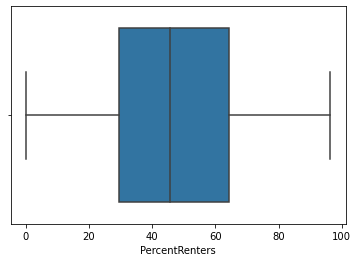

In [41]:
sns.boxplot(NC.PercentRenters)
plt.show()

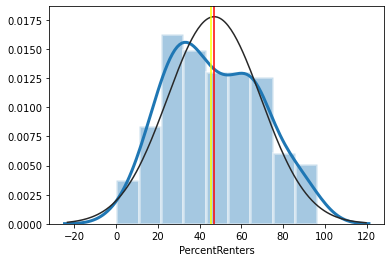

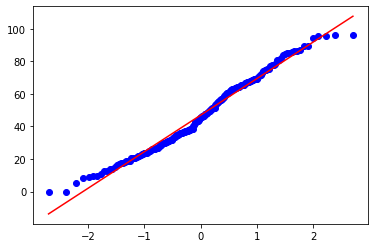

skewness: 0.212194
kurtosis: -0.765373


In [42]:
# kernel density plot
sns.distplot(NC.PercentRenters, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentRenters'].mean(),0,1, color = "red")
plt.axvline(NC['PercentRenters'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentRenters']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentRenters'], plot=plt)
plt.show()
print("skewness: %f" % NC['PercentRenters'].skew())
print("kurtosis: %f" % NC['PercentRenters'].kurt())


### PercentRentBurden

### North Carolina

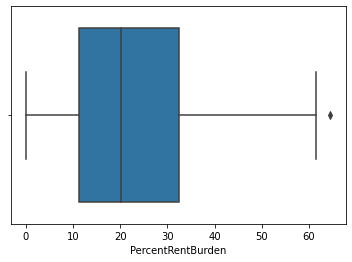

In [43]:
sns.boxplot(NC.PercentRentBurden)
plt.show()

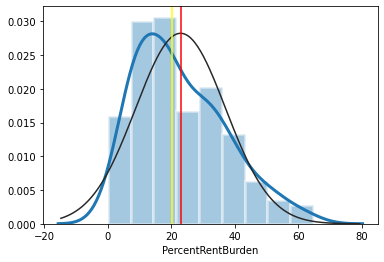

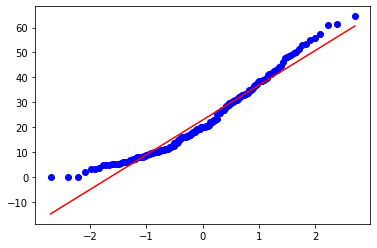

skewness: 0.697009
kurtosis: -0.130044


In [44]:
# kernel density plot
sns.distplot(NC.PercentRentBurden, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentRentBurden'].mean(),0,1, color = "red")
plt.axvline(NC['PercentRentBurden'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentRentBurden']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentRentBurden'], plot=plt)
plt.show()
print("skewness: %f" % NC['PercentRentBurden'].skew())
print("kurtosis: %f" % NC['PercentRentBurden'].kurt())


### PercentBachelors

### North Carolina

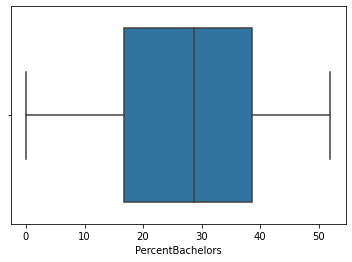

In [45]:
sns.boxplot(NC.PercentBachelors)
plt.show()

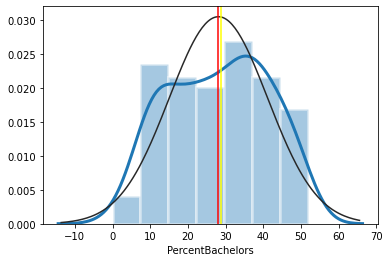

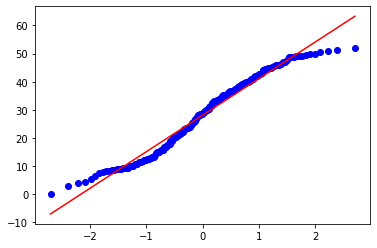

skewness: -0.069251
kurtosis: -1.092150


In [46]:
# kernel density plot
sns.distplot(NC.PercentBachelors, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentBachelors'].mean(),0,1, color = "red")
plt.axvline(NC['PercentBachelors'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentBachelors']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentBachelors'], plot=plt)
plt.show()
print("skewness: %f" % NC['PercentBachelors'].skew())
print("kurtosis: %f" % NC['PercentBachelors'].kurt())


### PercentNoSchooling

### North Carolina

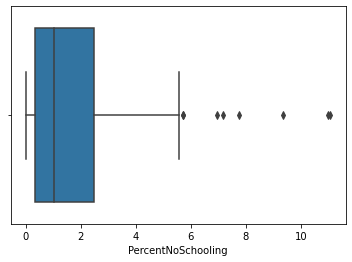

In [47]:
sns.boxplot(NC.PercentNoSchooling)
plt.show()

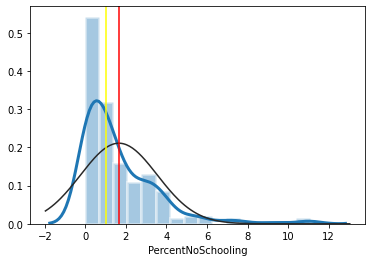

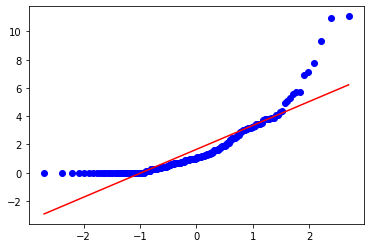

skewness: 2.183443
kurtosis: 6.583262


In [48]:
# kernel density plot
sns.distplot(NC.PercentNoSchooling, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['PercentNoSchooling'].mean(),0,1, color = "red")
plt.axvline(NC['PercentNoSchooling'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['PercentNoSchooling']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['PercentNoSchooling'], plot=plt)
plt.show()
print("skewness: %f" % NC['PercentNoSchooling'].skew())
print("kurtosis: %f" % NC['PercentNoSchooling'].kurt())


### MedianHouseholdIncomeE

### North Carolina

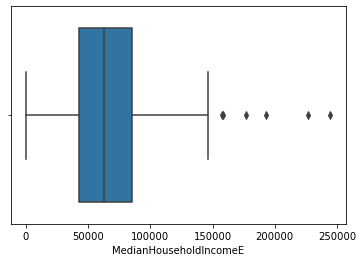

In [49]:
sns.boxplot(NC.MedianHouseholdIncomeE)
plt.show()

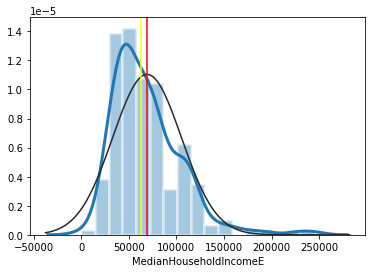

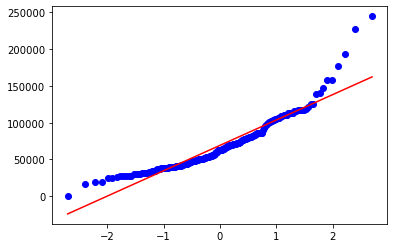

skewness: 1.555559
kurtosis: 4.106451


In [50]:
# kernel density plot
sns.distplot(NC.MedianHouseholdIncomeE, hist_kws={"edgecolor": 'w', "linewidth": 3},fit=norm,kde_kws={"linewidth": 3});
plt.axvline(NC['MedianHouseholdIncomeE'].mean(),0,1, color = "red")
plt.axvline(NC['MedianHouseholdIncomeE'].median(),0,1, color = "yellow")
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(NC['MedianHouseholdIncomeE']);
#QQ plot
fig = plt.figure()
res = stats.probplot(NC['MedianHouseholdIncomeE'], plot=plt)
plt.show()
print("skewness: %f" % NC['MedianHouseholdIncomeE'].skew())
print("kurtosis: %f" % NC['MedianHouseholdIncomeE'].kurt())


## Transformation 

### North Carolina

In [51]:
NCTransform = NC.drop(['GEOID','MedianHouseholdIncomeE','PerCapitaIncomePast12MonthsE', 'ContractRentE'],1)

In [52]:
NCTransform = NCTransform.transform(np.exp)

In [53]:
NCTransform=  NCTransform.fillna(0)

In [54]:
NCTransform = NCTransform.replace(inf, 0)
NCTransform = NCTransform.replace(-inf, 0)

In [55]:
NCTransform

,PovertyRate,UnemploymentRate,PercentReceivingSocialSecurity,PercentWithoutHealthInsurance,PercentSingleParent,PercentFemaleHeaded,PercentMinority,PercentMobileHomes,PercentRenters,PercentRentBurden,PercentBachelors,PercentNoSchooling
0,2758.6,4.4,510.6,85.0,1.0,1.0,6524130107743.2,1.0,4468978476925433948789756919808.0,560129273.7,15687865851398726877184.0,1.0
1,338261533776.3,501.5,820690872.8,30.2,153.8,1.0,27403833707695.4,1.0,1143348917827621831984076029952.0,178416087623.4,10808004253789974429696.0,1.8
2,266422.0,12.6,2447.2,87.3,1.0,1.0,3929156247.2,1.0,520567058741457418720983968809570271232.0,27403833707695.4,560559897704913633280.0,1.5
3,276833.7,13.7,465688.8,81.0,760.7,760.7,8779732071338609664.0,2.2,879757881019036766473790947328.0,4353887177.6,148461032673609024.0,1.9
4,399107746.8,16.7,19360.1,20.1,2269717504669368320.0,60152201862.6,565940075571400360853504.0,2.0,3671076852442125148737688294490374144.0,46914198958586832.0,171636781379561120.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1585.4,36.6,1908.8,374861.5,66356041832.1,66356041832.1,4885670409835205857645153673543680.0,2.1,171586336193500759621973835776.0,458469365543.3,1227448148399695.8,1.4
196,51647.5,232.4,21812820.5,1401753.8,374403458641.4,6124593.5,95801101127358542701638345620979712.0,29.4,3374655711550.9,945819.4,13364681112.4,4.3
197,38718173.4,2292080.4,5376716788918.2,469218.4,4327647456636.5,4271117087.4,6863474227183895099230942593279852544.0,1.0,4975801867252497408.0,187766771721.2,3371182.8,2.6
198,1289222621.3,355.3,7588212965.5,280271532.8,7979.7,7979.7,266692651468597518925824.0,67429603815042.8,90551595175691.4,1045228.4,7739650.9,28.1


In [56]:
# NCTransform.hist(bins = 50, figsize = (20,15))
# plt.show()

In [57]:
 calc_vif(NCTransform).sort_values(by=['VIF'],ascending=False)

,variables,VIF
0,PovertyRate,18929.1
5,PercentFemaleHeaded,4.9
4,PercentSingleParent,4.8
8,PercentRenters,1.1
9,PercentRentBurden,1.0
6,PercentMinority,1.0
3,PercentWithoutHealthInsurance,1.0
2,PercentReceivingSocialSecurity,1.0
7,PercentMobileHomes,1.0
1,UnemploymentRate,1.0


## Rescaling Variables

### North Carolina

In [58]:
NC.columns

Index(['GEOID', 'ContractRentE', 'PerCapitaIncomePast12MonthsE',
       'MedianHouseholdIncomeE', 'PovertyRate', 'UnemploymentRate',
       'PercentReceivingSocialSecurity', 'PercentWithoutHealthInsurance',
       'PercentSingleParent', 'PercentFemaleHeaded', 'PercentMinority',
       'PercentMobileHomes', 'PercentRenters', 'PercentRentBurden',
       'PercentBachelors', 'PercentNoSchooling'],
      dtype='object')

In [59]:
NC['PercentPovertRateRescaled'] =  1 - NC['PovertyRate']
NC['PercentReceivingSocialSecurity'] =  1 - NC['PercentReceivingSocialSecurity']
NC['PercentSingleParentRescaled'] =  1 - NC['PercentSingleParent']
NC['PercentFemaleHeadedRescaled'] =  1 - NC['PercentFemaleHeaded']
NC['PercentNoSchoolingRescaled'] =  1 - NC['PercentNoSchooling']
NC['PercentMobileHomesRescaled'] =  1 - NC['PercentMobileHomes']
NC['PercentWithoutHealthInsuranceRescaled'] =  1 - NC['PercentWithoutHealthInsurance']
NC['PercentRentBurdenRescaled'] =  1 - NC['PercentRentBurden']
NC['PercentRentersRescaled'] =  1 - NC['PercentRenters']
NC['UnemploymentRateRescaled'] =  1 - NC['UnemploymentRate']
NC['PercentMinorityRescaled'] =  1 - NC['PercentMinority']

In [60]:
NCscaled = NC.drop(['GEOID','PovertyRate', 'UnemploymentRate',
       'PercentReceivingSocialSecurity', 'PercentWithoutHealthInsurance',
       'PercentSingleParent', 'PercentFemaleHeaded', 'PercentMinority',
       'PercentMobileHomes', 'PercentRenters', 'PercentRentBurden', 'PercentNoSchooling'],1)

In [61]:
NCscaled.columns 

Index(['ContractRentE', 'PerCapitaIncomePast12MonthsE',
       'MedianHouseholdIncomeE', 'PercentBachelors',
       'PercentPovertRateRescaled', 'PercentSingleParentRescaled',
       'PercentFemaleHeadedRescaled', 'PercentNoSchoolingRescaled',
       'PercentMobileHomesRescaled', 'PercentWithoutHealthInsuranceRescaled',
       'PercentRentBurdenRescaled', 'PercentRentersRescaled',
       'UnemploymentRateRescaled', 'PercentMinorityRescaled'],
      dtype='object')

In [62]:
NCscaled

,ContractRentE,PerCapitaIncomePast12MonthsE,MedianHouseholdIncomeE,PercentBachelors,PercentPovertRateRescaled,PercentSingleParentRescaled,PercentFemaleHeadedRescaled,PercentNoSchoolingRescaled,PercentMobileHomesRescaled,PercentWithoutHealthInsuranceRescaled,PercentRentBurdenRescaled,PercentRentersRescaled,UnemploymentRateRescaled,PercentMinorityRescaled
0,1659.0,107357.0,113357.0,51.1,-6.9,1.0,1.0,1.0,1.0,-3.4,-19.1,-69.6,-0.5,-28.5
1,1331.0,77023.0,63795.0,50.7,-25.5,-4.0,1.0,0.4,1.0,-2.4,-24.9,-68.2,-5.2,-29.9
2,1366.0,61359.0,79412.0,47.8,-11.5,1.0,1.0,0.6,1.0,-3.5,-29.9,-88.1,-1.5,-21.1
3,1249.0,51922.0,76344.0,39.5,-11.5,-5.6,-5.6,0.4,0.2,-3.4,-21.2,-67.9,-1.6,-42.6
4,1197.0,43210.0,51667.0,39.7,-18.8,-41.3,-23.8,-0.1,0.3,-2.0,-37.4,-83.2,-1.8,-53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1134.0,36510.0,62466.0,34.7,-6.4,-23.9,-23.9,0.6,0.3,-11.8,-25.9,-66.3,-2.6,-76.6
196,1271.0,25079.0,62894.0,23.3,-9.9,-25.6,-14.6,-0.5,-2.4,-13.2,-12.8,-27.8,-4.4,-79.5
197,772.0,24686.0,38092.0,15.0,-16.5,-28.1,-21.2,0.0,1.0,-12.1,-25.0,-42.1,-13.6,-83.8
198,630.0,31191.0,54928.0,15.9,-20.0,-8.0,-8.0,-2.3,-30.8,-18.5,-12.9,-31.1,-4.9,-52.9


In [63]:
calc_vif(NCscaled).sort_values(by=['VIF'],ascending=False)

,variables,VIF
5,PercentSingleParentRescaled,46.1
6,PercentFemaleHeadedRescaled,37.1
11,PercentRentersRescaled,36.3
2,MedianHouseholdIncomeE,35.6
10,PercentRentBurdenRescaled,32.6
1,PerCapitaIncomePast12MonthsE,28.6
3,PercentBachelors,27.8
0,ContractRentE,24.1
13,PercentMinorityRescaled,18.3
4,PercentPovertRateRescaled,10.1


In [64]:
NCscaled['GEOID'] = NC['GEOID']

In [65]:
## PovertyRate ## Percent Receiving Social Secuirity #UnemploymentRate #PercentWithoutHealthInsurance ##PercentNoSchooling

## Standardization 

### North Carolina

In [66]:
NCscaler = StandardScaler()
NCscaler.fit(NCscaled)
NCstandardize = NCscaler.transform(NCscaled)

NCStd = pd.DataFrame(NCstandardize, index = NCscaled.index, columns= NCscaled.columns)

In [67]:
NCMinMax = MinMaxScaler()
NCMinMax.fit(NCscaled)
NCscale = NCMinMax.transform(NCscaled)

NCMinMax = pd.DataFrame(NCscale, index = NCscaled.index, columns= NCscaled.columns)

In [68]:
NCRobust = RobustScaler(quantile_range=(25.0,75.0))
NCRobust.fit(NCscaled)
NCRobustscale = NCRobust.transform(NCscaled)

NCRobustsca = pd.DataFrame(NCRobustscale, index = NCscaled.index, columns= NCscaled.columns)

In [69]:
# NCMinMax['GEOID'] =  NC['GEOID']

### Principal Component Analysis

### North Carolina

- Drop the GEOID column
- Calculate the VIF for the main variables

In [70]:
NCStd = NCStd.drop(['GEOID'],1)

In [71]:
calc_vif(NCStd).sort_values(by=['VIF'],ascending=False)

,variables,VIF
5,PercentSingleParentRescaled,15.6
6,PercentFemaleHeadedRescaled,14.9
10,PercentRentBurdenRescaled,9.6
2,MedianHouseholdIncomeE,7.7
1,PerCapitaIncomePast12MonthsE,7.5
11,PercentRentersRescaled,7.0
3,PercentBachelors,6.2
13,PercentMinorityRescaled,5.1
4,PercentPovertRateRescaled,4.6
9,PercentWithoutHealthInsuranceRescaled,3.4


- Standard Scaler

In [72]:
### For standard scaler

PC = PCA(n_components =1)
PC.fit(NCStd)
NCStandardPCA = PC.transform(NCStd)
print(PC.explained_variance_ratio_)

[0.55611021]


In [73]:
NC['NCStandardPCA'] = NCStandardPCA 

- MinMaxScaler

In [74]:
NCMinMax = NCMinMax.drop(['GEOID'],1)

In [75]:
calc_vif(NCMinMax).sort_values(by=['VIF'],ascending=False)

,variables,VIF
6,PercentFemaleHeadedRescaled,350.5
5,PercentSingleParentRescaled,285.1
10,PercentRentBurdenRescaled,92.1
4,PercentPovertRateRescaled,71.8
9,PercentWithoutHealthInsuranceRescaled,44.0
11,PercentRentersRescaled,41.2
8,PercentMobileHomesRescaled,36.1
2,MedianHouseholdIncomeE,35.7
3,PercentBachelors,34.3
7,PercentNoSchoolingRescaled,33.1


In [76]:
## For min max

PC = PCA(n_components =1)
PC.fit(NCMinMax )
NCMinMaxPCA = PC.transform(NCMinMax)

print(PC.explained_variance_ratio_)


[0.59519378]


In [77]:
NC['NCMinMaxPCA'] = NCMinMaxPCA

- RobustScaler

In [78]:
NCRobustsca= NCRobustsca.drop(['GEOID'],1)

In [79]:
calc_vif(NCRobustsca).sort_values(by=['VIF'],ascending=False)

,variables,VIF
5,PercentSingleParentRescaled,16.1
6,PercentFemaleHeadedRescaled,15.7
10,PercentRentBurdenRescaled,9.4
1,PerCapitaIncomePast12MonthsE,7.9
2,MedianHouseholdIncomeE,7.9
11,PercentRentersRescaled,7.0
3,PercentBachelors,5.9
4,PercentPovertRateRescaled,4.8
13,PercentMinorityRescaled,4.5
9,PercentWithoutHealthInsuranceRescaled,3.5


In [80]:
## For RobustScaler 

PC = PCA(n_components =1)
PC.fit(NCRobustsca)
NCRobustscale = PC.transform(NCRobustsca)

print(PC.explained_variance_ratio_)



[0.55972853]


In [81]:
NC['NCRobustScale'] = NCRobustscale

- MinMaxScaler

### Export Data

- Export final data 
- Check the length of data

In [82]:
NC.to_csv("NCPCAdata.csv", index = False)

In [83]:
len(NC),len(NCMinMaxPCA)

(200, 200)